In [5]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
from birdset.datamodule.components.transforms import BirdSetTransformsWrapper
dataset_config = DatasetConfig(
        data_dir="data_birdset/HSN",
        dataset_name="HSN",
        hf_path="DBD-research-group/BirdSet",
        hf_name="HSN",
        n_workers=3,
        val_split=0.2,
        task="multilabel",
        classlimit=500,
        eventlimit=5,
        sampling_rate=32000,
        )

transforms = BirdSetTransformsWrapper(
    task=dataset_config.task,
)
datamodule = BirdSetDataModule(dataset=dataset_config)


/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
datamodule.prepare_data()

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
sampling: 100%|██████████| 21/21 [00:01<00:00, 11.01it/s]


One-hot-encoding train labels. (num_proc=3):   0%|          | 0/17940 [00:00<?, ? examples/s]

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Pass

One-hot-encoding test_5s labels. (num_proc=3):   0%|          | 0/12000 [00:00<?, ? examples/s]

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Pass

Saving the dataset (0/1 shards):   0%|          | 0/14352 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3588 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

In [7]:
datamodule.setup("fit")

In [8]:
train_loader = datamodule.train_dataloader()
# get the first batch
batch = next(iter(train_loader))
# get shape of the batch
print(batch["input_values"].shape)
print(batch["labels"].shape)

2025-02-05 11:42:17.473056: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 11:42:17.473117: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 11:42:17.473558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 11:42:17.560552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


torch.Size([32, 1, 128, 1024])
torch.Size([32, 21])


In [10]:
from functools import partial
from biofoundation.modules.models.audiomae import AudioMAEModel
from birdset.configs import NetworkConfig, MulticlassMetricsConfig
from torch import nn
import torch
checkpoint = torch.load("/workspace/models/audiomae/pretrained.pth", map_location="cpu")
model =  AudioMAEModel(num_classes=datamodule.num_classes,checkpoint=checkpoint)
model

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance,

AudioMAEModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none'

torch.Size([1, 1, 1024, 128])
torch.Size([10, 128])
(10, 128)


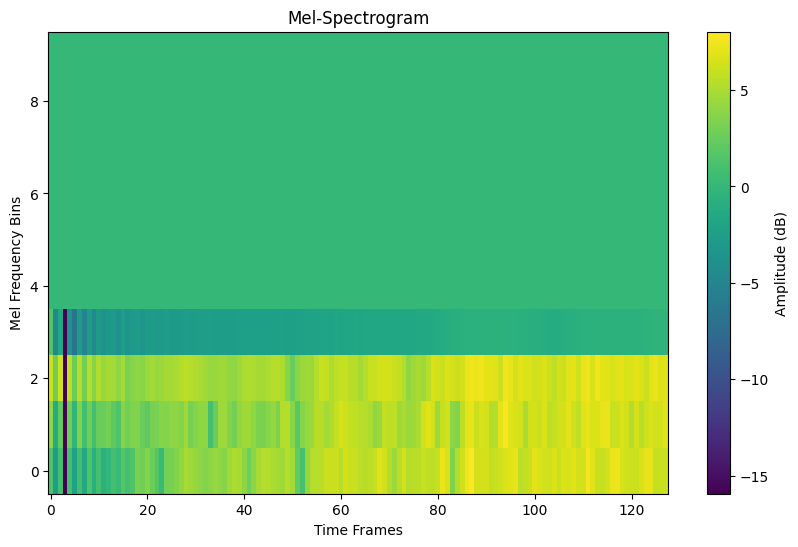

Mel Spectrogram Shape: (10, 128)


In [46]:
from torchaudio.compliance import kaldi
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from biofoundation.modules.models.audiomae import AudioMAEModel
from birdset.configs import NetworkConfig, MulticlassMetricsConfig
from torch import nn
import torch
melspec= model.preprocess(batch['input_values'][2])
print(melspec.size())
melspec
input_values = batch['input_values'][2]
melspecs = []
MEAN = -4.2677393
STD = 4.5689974
device = input_values.device
for waveform in input_values:
    melspec = kaldi.fbank(
        waveform, htk_compat=True, window_type="hanning", num_mel_bins=128
    )  # shape (n_frames, 128)
    if melspec.shape[0] < 10:
        melspec = F.pad(melspec, (0, 0, 0, 10 - melspec.shape[0]))
        #print("hi")
    else:
        melspec = melspec[:10]
    melspecs.append(melspec)
    melspecs = torch.stack(melspecs).to(device)
    melspecs = melspecs.unsqueeze(1)  # shape (batch_size, 1, 128, 1024)
    melspecs = (melspecs - MEAN) / (STD * 2)


melspec_tensor = melspecs # Replace this with your actual tensor
melspec_array = melspec_tensor.squeeze().detach().numpy()  # Remove the batch and channel dimensions
#print (melspec_array.shape)
# Plot the spectrogram
print(melspec.size())
melspec_tensor = melspec # Replace this with your actual tensor
melspec_array = melspec_tensor.squeeze().detach().numpy()  # Remove the batch and channel dimensions
print (melspec_array.shape)
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(melspec_array, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude (dB)')
plt.title('Mel-Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')
plt.show()

print("Mel Spectrogram Shape:", melspec_array.shape)


In [12]:
embeddings = model.get_embeddings(batch['input_values'][31])
print(embeddings.size())
embeddings

torch.Size([1, 768])


tensor([[-5.4035e-02, -3.5552e-03, -7.9905e-02, -5.6754e-02, -1.5731e-01,
         -4.8319e-02, -1.4103e-01, -7.2551e-02,  3.4690e-02, -2.4326e-02,
         -3.0020e-01,  3.7401e-03, -1.2806e-02, -1.6593e-02, -7.9335e-02,
         -2.4911e-02, -2.5408e-04, -5.1526e-02, -1.8865e-02, -2.6347e-02,
         -1.3118e-01, -4.3863e-02, -7.9458e-02, -6.6650e-02, -8.3091e-02,
         -4.6511e-02, -4.1162e-02,  4.8097e-02, -2.1041e-02,  3.5008e-02,
         -9.4386e-02, -1.3178e-01, -1.9525e-02, -6.2323e-02, -2.4219e-02,
         -2.5762e-02, -4.5816e-02, -3.0801e-02, -1.4162e-01, -1.0507e-01,
         -6.6238e-02, -8.3083e-02, -5.1483e-02, -2.0010e-02, -1.1864e-02,
         -6.0278e-02, -5.9266e-02, -1.4372e-02,  3.8670e-02, -7.6725e-02,
         -5.3929e-02, -5.7535e-02,  3.1894e-03, -3.7835e-02, -5.8583e-02,
         -4.2298e-02, -3.6601e-02, -6.6854e-02, -7.2371e-02,  3.2283e-02,
         -6.9334e-03, -4.0403e-02,  2.9732e-02, -1.7339e-01, -1.5251e-02,
         -2.3174e-03,  4.5634e-02, -5.

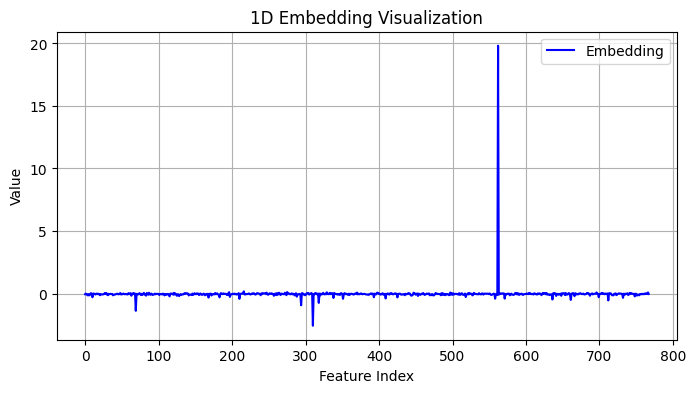

In [14]:
import torch
import matplotlib.pyplot as plt

# Example tensor (replace this with your actual tensor)
embedding_tensor = embeddings

# Convert tensor to numpy array for plotting
embedding_array = embedding_tensor.squeeze()
embedding_array=embedding_array.detach().numpy()  # Remove the first dimension

# Plot the embedding as a line chart
plt.figure(figsize=(8, 4))
plt.plot(embedding_array, color='b', label='Embedding')
plt.title('1D Embedding Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



torch.Size([1, 1, 1024, 128])
(1024, 128)


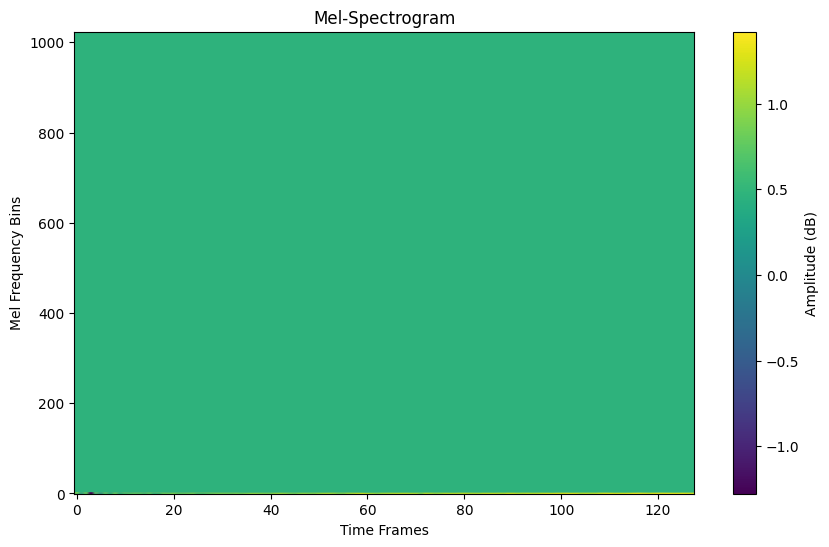

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from biofoundation.modules.models.audiomae import AudioMAEModel
from birdset.configs import NetworkConfig, MulticlassMetricsConfig
from torch import nn
import torch
checkpoint = torch.load("/workspace/models/audiomae/pretrained.pth", map_location="cpu")
model =  AudioMAEModel(num_classes=datamodule.num_classes,checkpoint=checkpoint)
model

# Example tensor (replace this with your actual tensor)
melspec= model.preprocess(batch['input_values'][31])
print(melspec.size())
melspec_tensor = melspec # Replace this with your actual tensor
melspec_array = melspec_tensor.squeeze().detach().numpy()  # Remove the batch and channel dimensions
print (melspec_array.shape)
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(melspec_array, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude (dB)')
plt.title('Mel-Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')
plt.show()



In [36]:
print(melspec_array[:5, :5])  # Print first 5x5 values


[[ 0.6103834   0.17192836  0.54875076 -1.2775939   0.51726544]
 [ 0.99593294  0.5729543   0.94977665 -1.2775939   0.625739  ]
 [ 1.1655796   0.7919082   1.1687305  -1.2775939   1.090743  ]
 [ 0.6696756  -0.0272352   0.34958723 -1.2775939   0.09712575]
 [ 0.46703237  0.46703237  0.46703237  0.46703237  0.46703237]]


In [17]:
from torch.nn import BCEWithLogitsLoss
from torch.nn.modules.loss import _Loss
logits = model.forward(batch['input_values'][31])
print(logits.size())
model.load_model

torch.Size([1, 21])


<bound method AudioMAEModel.load_model of AudioMAEModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True

In [19]:
logits = model.forward(batch['input_values'][0])
#loss = torch.nn.BCEWithLogitsLoss(logits[0],batch['labels'][0])
print(batch['labels'][0].size())
print(logits[0].size())
labels = batch['labels'][0]

# Create the loss function
criterion = torch.nn.BCEWithLogitsLoss()

# Compute the loss
loss = criterion(logits[0], labels)

print(f"Loss: {loss.item()}")

torch.Size([21])
torch.Size([21])
Loss: 0.73046875


In [13]:
import timm
import torch

# Create the model from Hugging Face Hub
model = timm.create_model("hf_hub:gaunernst/vit_base_patch16_1024_128.audiomae_as2m", pretrained=True)
# Load the local checkpoint
checkpoint = torch.load("/workspace/models/audiomae/pretrained.pth", map_location="cpu")

# If the checkpoint contains a state dict inside a key (e.g., "state_dict"), extract it
if "state_dict" in checkpoint:
    checkpoint = checkpoint["state_dict"]
else:
    checkpoint = checkpoint["model"]
    print("1")

# Rename keys if necessary (e.g., if they contain prefixes like "module.")
checkpoint = {k.replace("module.", ""): v for k, v in checkpoint.items()}

# Load the weights into the model
model.load_state_dict(checkpoint, strict=False)

print("Checkpoint loaded successfully!")

     


1
Checkpoint loaded successfully!
